In [1]:
%pwd


'H:\\Basics-of-Unsupervised-learning'

### I will try to explain basics of unsupervised ML

## This  involves discovering pattern in Data

### we will try to discover pattern in iris data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [49]:
df = pd.read_csv('Iris.csv' ,index_col=False)

In [50]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
df.drop(labels='Id' ,inplace=True ,axis=1)


In [52]:
df.drop(labels='Species' , inplace = True , axis=1)

In [53]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [54]:
df = df.values   # This will convert whole data frame into Numpy 2D array

In [57]:
type(df)

numpy.ndarray

In [58]:
## let create a k-mean model
model = KMeans(n_clusters=3)

In [59]:
model.fit(df)  ## fit the data set into the model 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
labels = model.predict(df)

In [61]:
print(labels)  ## predict there clusters level

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [63]:
new_label = model.predict([[3.4 ,2.5 ,2.1,0.5]])  # prediction on new data set

In [65]:
new_label # assigned clusture

array([1])

### visualization based on clustering

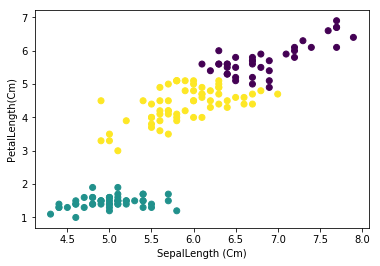

In [70]:
xs = df[:,0]
ys = df[:,2]
plt.scatter(xs ,ys ,c=labels)  ## c is used as clustering color on color for one cluster
plt.xlabel('SepalLength (Cm)')
plt.ylabel('PetalLength(Cm)')
plt.show()
%matplotlib inline

## KMeans assign level based on there "centroids" point will be assigned label basd n its nearest Cdentroid

## let's visualize centroid as well

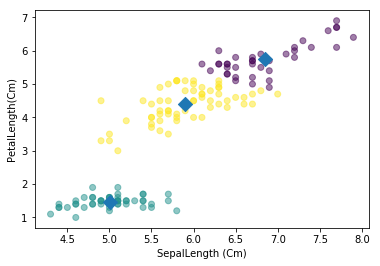

In [79]:
xs = df[:,0]
ys = df[:,2]
plt.scatter(xs ,ys ,c=labels ,alpha=0.5)  ## c is used as clustering color on color for one cluster
plt.xlabel('SepalLength (Cm)')
plt.ylabel('PetalLength(Cm)')
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,2]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x ,centroids_y ,marker='D' ,s=100)
plt.show()

### Point nearest to the centroid will recieve label of that centroid

In [82]:
centroids  ### Ypu can see the centroids assign for different dimensions

array([[ 6.85      ,  3.07368421,  5.74210526,  2.07105263],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097]])